# Um estudo sobre Sistemas de Recomendação 🎥

> "O maior inimigo do conhecimento não é ignorância,
> mas sim a ilusão de conhecimento."
> -Stephen Hawking

  
## Objetivo

O objetivo principal deste notebook é a construção de um guia técnico para desenvolvimento de Sistemas de Recomendação. Utiliza-se como referência prática os notebooks apresentados em [Film recommendation engine](https://www.kaggle.com/fabiendaniel/film-recommendation-engine), [Netflix Visualizations, Recommendation, EDA](https://www.kaggle.com/niharika41298/netflix-visualizations-recommendation-eda) e [A beginner's guide to Recommendation Systems](https://www.kaggle.com/arushikhokharr/a-beginner-s-guide-to-recommendation-systems), além é claro de referências teóricas como [A hybrid recommender system based-on link prediction for movie baskets analysis](https://journalofbigdata.springeropen.com/articles/10.1186/s40537-021-00422-0).

O estudo será pautado em cima da base de dados [MovieLens 100k Dataset](https://www.kaggle.com/prajitdatta/movielens-100k-dataset), objeto que representa a coleta de 100,000 avaliações (que variam de 1 a 5) de 943 usuários sobre 1682 filmes do site MovieLens entre os anos de 97 e 98. Também está disponível as informações básicas de cada usuário na base, praticamente encontramos Gênero, Idade, Profissão e Endereço.

O sistema funcionará a partir de uma função que poderá receber como parâmetro o ID de um usuário ou o ID de um filme, e retornará uma lista dos 5 filmes mais prováveis de serem de próximos da referência dada.

Na prática, a função utilizará de alguns critérios técnicos para obter as recomendações, sendo elas:

#### Abordagens Tradicionais

- **Filtragem baseada em popularidade**: O mais simples dos algorítmos de recomendação e o mais impesssoal, utiliza as informações agregadas de consumo dos intens para indicar a recomendação. É o famoso "O que está bombando na Netflix".

- **Filtragem baseada em conteúdo:** Sistemas que utilizam essa abordagem avaliam as propriedades descritivas dos itens e usuários, assumindo que um usuário vai gostar de itens parecidos com os que ele já gostou. Geralmente é utilizado quando não temos acesso as avaliações feitas por outros usuários aos itens.

- **Filtragem Colaborativa:** Sistemas que utilizam esta abordagem assumem que um usuário deve gostar de itens escolhidos por usuários com gostos parecidos

#### ✨Abordagens Contemporâneas ✨

- **Filtragem híbrida com Link Prediction:** Um sistema que utiliza diversas técnicas de recomendação para tratar casos de cold-start, ou seja, quando os novos usuários que ainda não tenham visto muitos filmes na plataforma tendem a sofrer com os métodos anteriores.



 ## Luz, Câmera, Ação!

In [4]:
#Este é um GIF daqueles carinhas que fecham um take do cinema para indicar que a ação esta começando a ser gravada, caso não abra no seu navegador :(
from IPython.display import IFrame
iframe_url = "https://cdn.substack.com/image/fetch/f_auto,q_auto:good,fl_progressive:steep/https%3A%2F%2Fbucketeer-e05bbc84-baa3-437e-9518-adb32be77984.s3.amazonaws.com%2Fpublic%2Fimages%2F22633874-cce7-4818-b156-9a36b7b614e2_522x360.gif"
IFrame(src=iframe_url, width=550, height=400)

  Este notebook está organizado da seguinte maneira:
 
 1. **Bibliotecas Utilizadas**
 2. **Preparação dos Dados**
 
     - Leitura
     - Nomeação das colunas e limpeza de colunas sem função
     - Adaptação dos tipos de dados
     - Tratativa de valores faltantes
     - Obtenção do ESTADO dos EUA ao qual o usuário pertence
     
 
 3. **Análise Exploratória dos Dados**
 
     - Histogramas e Boxplots da quantidade de avaliações de cada filme
     - Histogramas e Boxplots da avaliação média recebida por cada filme
     - Top 10 filmes por quantidade de avaliações
     - Top 10 filmes por avaliação média recebida
     - Scatterplot da correlação entre avaliação média recebida por cada filme vs a quantidade de avaliações recebidas por cada filme
     - Barplot com os gêneros que mais receberam avaliações
     - Lollipopplot da quantidade de filmes lançados por ano
     - Barplot da quantidade de avaliações por gênero
     - Barplot da quantidade de avaliações por estado (EUA)
     - Barplot da quantidade de avaliações por profissão
     
     
 4. **Sistema de Recomendação**
 
     - Popularidade
     - Popularidade nos últimos tempos
     - Baseados em conteúdo (usuários)
     - Filtragem colaborativa
     
     
 5. **Interpretação dos Resultados**

 ## 1. Bibliotecas Utilizadas
 
 - Pandas
 - Datetime
 - Matplotlib
 - Seaborn
 - Datetime
 - Pyzipcode
 - Warnings

In [5]:
!pip install pyzipcode

In [6]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from pyzipcode import ZipCodeDatabase
import warnings

warnings.filterwarnings('ignore')
sns.set_style("darkgrid")
%matplotlib inline

## 2. Preparação dos Dados

### Base de interações

In [7]:
#Leitura dos dados de interação via pandas, arquivo é um tsv (texto separado por tab)
nomes_das_colunas=['id_usuario','id_filme','avaliacao','data_avaliacao']
df=pd.read_csv("archive/ml-100k/u.data",sep="\t",names=nomes_das_colunas)

#Conversão do formato data da avaliação que estava em Unix
data_inicio_unix = datetime(1970, 1, 1)
df['data_avaliacao'] = df.data_avaliacao.apply(lambda x: data_inicio_unix + timedelta(seconds=x)).dt.date

#Colocar as colunas de ID como texto
df['id_usuario'] = df['id_usuario'].astype(str)
df['id_filme'] = df['id_filme'].astype(str)

print('\nQuantidade de linhas na base de dados:', df.shape[0],'\nQuantidade de colunas na base de dados:', df.shape[1],'\n')
df.head()


Quantidade de linhas na base de dados: 100000 
Quantidade de colunas na base de dados: 4 



,id_usuario,id_filme,avaliacao,data_avaliacao
0,196,242,3,1997-12-04
1,186,302,3,1998-04-04
2,22,377,1,1997-11-07
3,244,51,2,1997-11-27
4,166,346,1,1998-02-02


Verificando a existência de valores faltantes

In [8]:
#Nenhum foi encontrado
df.count()

id_usuario        100000
id_filme          100000
avaliacao         100000
data_avaliacao    100000
dtype: int64

### Base com dados sobre os filmes

In [9]:
#Leitura dos metadados dos filmes via pandas, arquivo agora é separado por |
nomes_das_colunas=['id_filme','nome_filme','data_lancamento','data_lancamento_dvd','IMDb_url', 'tema_desconhecido', 'tema_acao', 'tema_aventura','tema_animacao','tema_criancas','tema_comedia',
                   'tema_crime','tema_documentario', 'tema_drama', 'tema_fantasia','tema_preto_branco','tema_horror','tema_musical','tema_misterio', 'tema_romance','tema_fic_cientifica', 
                   'tema_suspense', 'tema_guerra','tema_velho_oeste']
df_item=pd.read_csv("archive/ml-100k/u.item",sep="\|",names=nomes_das_colunas, engine='python')

#Deletamos alguns colunas que não tinham informações relevantes para a analise
df_item.drop(columns=['data_lancamento_dvd','IMDb_url'], inplace=True)

#Colocar a coluna de ID como texto
df_item['id_filme'] = df_item['id_filme'].astype(str)

print('\nQuantidade de linhas na base de dados:', df_item.shape[0],'\nQuantidade de colunas na base de dados:', df_item.shape[1],'\n')
df_item.head()


Quantidade de linhas na base de dados: 1682 
Quantidade de colunas na base de dados: 22 



,id_filme,nome_filme,data_lancamento,tema_desconhecido,tema_acao,tema_aventura,tema_animacao,tema_criancas,tema_comedia,tema_crime,...,tema_fantasia,tema_preto_branco,tema_horror,tema_musical,tema_misterio,tema_romance,tema_fic_cientifica,tema_suspense,tema_guerra,tema_velho_oeste
0,1,Toy Story (1995),01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


Verificando a existência de valores faltantes:

In [10]:
df_item.count()

id_filme               1682
nome_filme             1682
data_lancamento        1681
tema_desconhecido      1682
tema_acao              1682
tema_aventura          1682
tema_animacao          1682
tema_criancas          1682
tema_comedia           1682
tema_crime             1682
tema_documentario      1682
tema_drama             1682
tema_fantasia          1682
tema_preto_branco      1682
tema_horror            1682
tema_musical           1682
tema_misterio          1682
tema_romance           1682
tema_fic_cientifica    1682
tema_suspense          1682
tema_guerra            1682
tema_velho_oeste       1682
dtype: int64

Verificamos que um filme na base de dados possui tema desconhecido, sem nome e sem data de lançamento. Provavelmente um erro.

O id do filme é o 267.

In [11]:
df_item[df_item['data_lancamento'].isna()]

,id_filme,nome_filme,data_lancamento,tema_desconhecido,tema_acao,tema_aventura,tema_animacao,tema_criancas,tema_comedia,tema_crime,...,tema_fantasia,tema_preto_branco,tema_horror,tema_musical,tema_misterio,tema_romance,tema_fic_cientifica,tema_suspense,tema_guerra,tema_velho_oeste
266,267,unknown,NaN,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Vamos eliminar a unica com valores faltantes:

In [12]:
df_item.drop(df_item[df_item['data_lancamento'].isna()].index, inplace=True)

Precisamos eliminar as linhas que também contenham avaliação para este filme desconhecido na base de interações.

In [13]:
df[df['id_filme']==267]

,id_usuario,id_filme,avaliacao,data_avaliacao


Vamos eliminar as linhas com avaliacoes desse filme

In [14]:
df.drop(df[df['id_filme']==267].index, inplace=True)

### Base com dados sobre os usuários

In [15]:
#Leitura dos metadados de usuarios via pandas, arquivo é separado por |
nomes_das_colunas=['id_usuario','idade','sexo','profissao','cep']
df_usuarios=pd.read_csv("archive/ml-100k/u.user",sep="\|",names=nomes_das_colunas, engine='python')

#Colocar a coluna de ID como texto
df_usuarios['id_usuario'] = df_usuarios['id_usuario'].astype(str)

print('\nQuantidade de linhas na base de dados:', df_usuarios.shape[0],'\nQuantidade de colunas na base de dados:', df_usuarios.shape[1],'\n')
df_usuarios.head()


Quantidade de linhas na base de dados: 943 
Quantidade de colunas na base de dados: 5 



,id_usuario,idade,sexo,profissao,cep
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


Verificando a existência de valores faltantes

In [16]:
#Nenhum foi encontrado
df_usuarios.count()

id_usuario    943
idade         943
sexo          943
profissao     943
cep           943
dtype: int64

Substituição do campo cep (zip code no USA) pelo estado ao qual ao qual o usuario de fato pertence.

Assumimos que os zip_codes nao encontrados pela biblioteca são de fora dos EUA.

In [17]:
zcdb = ZipCodeDatabase()
lista_auxiliar = []
for zip_code in df_usuarios['cep'].values:
    try:
        zipcode = zcdb[int(zip_code)]
        lista_auxiliar.append(zipcode.state)
    except:
        lista_auxiliar.append('OUT')
df_usuarios['estado_usa'] = lista_auxiliar

#Deletamos a coluna do CEP porque não precisaremos mais dela
df_usuarios.drop(columns=['cep'], inplace=True)

## 3. Análise Exploratória dos Dados

Preparativos prontos, vamos para algumas análises rápidas sobre os dados

In [18]:
#Este é um GIF da largada da formula1, caso não abra no seu navegador :(
iframe_url = "https://j.gifs.com/jRglGW.gif"
IFrame(src=iframe_url, width=500, height=270)

#### Histrograma da quantidade de avaliações

Criando um dataframe temporário para analisar a distribuição das avaliações e suas quantidades

In [19]:
df_agrupado = df[['id_filme','avaliacao']].groupby(by='id_filme').agg(['count','mean'])['avaliacao'].reset_index()

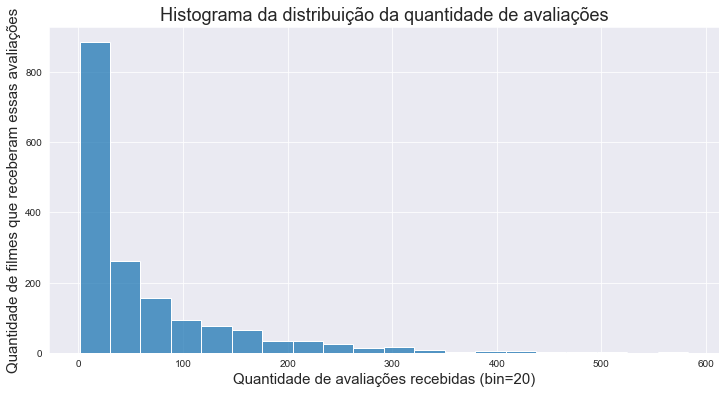

In [20]:
plt.figure(figsize=(12,6))
sns.histplot(df_agrupado['count'], bins=20)
plt.title('Histograma da distribuição da quantidade de avaliações', fontsize=18)
plt.xlabel('Quantidade de avaliações recebidas (bin=20)', fontsize=15)
plt.ylabel('Quantidade de filmes que receberam essas avaliações', fontsize=15)
plt.show()

Este gráfico é interessante, mostra a distribuição da quantidade de avaliações recebidas pelos filmes. A leitura é simples, no eixo X temos a quantidade de avaliações recebidas pelo filme, separadas por grupos de 20. Já no eixo Y temos a quantidade de filmes que receberam essa quantidade de avaliações mencionada no eixo X. Em outras palavras, temos que mais de 800 filmes receberam até 20 avaliações. Isso demonstra a assimetria a direita na distribuição, ou seja, muitos filmes possuem poucas avaliações a poucos filmes recebem muitas avaliações.

#### Boxplot da quantidade de avaliações

Isso pode também ser confirmado pelo gráfico de boxplot, onde podemos notar que a linha preta no meio da pilha (mediana da quantidade de avaliações) está mais perto da primeira linha horizontal (1º quartil), e alguns outros outliers podem ser encontrados na parte superior (pontos pretos).

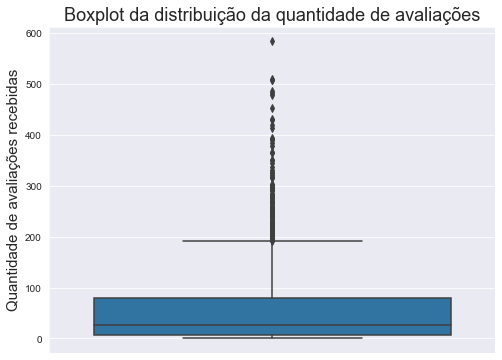

In [21]:
plt.figure(figsize=(8,6))
sns.boxplot(y = 'count', data = df_agrupado)
plt.title('Boxplot da distribuição da quantidade de avaliações', fontsize=18)
plt.ylabel('Quantidade de avaliações recebidas', fontsize=15)
plt.show()

#### Histrograma da média de avaliações

Da mesma maneira pode ser interessante analisar a média das avaliações dadas pelos usuários, então:

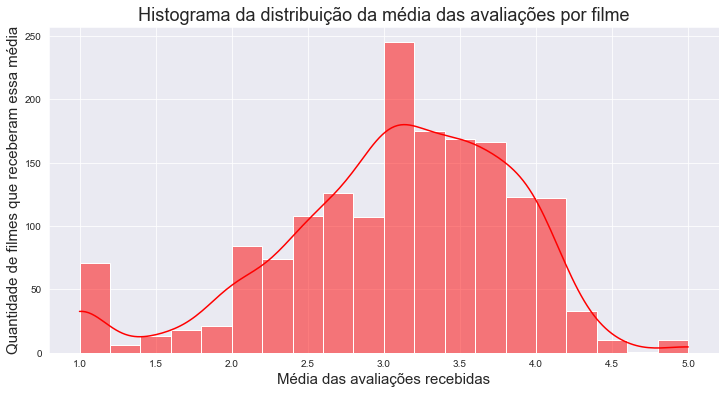

In [22]:
plt.figure(figsize=(12,6))
sns.histplot(df_agrupado['mean'], bins=20, kde=True, color='red')
plt.title('Histograma da distribuição da média das avaliações por filme', fontsize=18)
plt.ylabel('Quantidade de filmes que receberam essa média', fontsize=15)
plt.xlabel('Média das avaliações recebidas', fontsize=15)
plt.show()

#### Boxplot da média de avaliações

Tanto com o histograma acima, como com o boxplot abaixo podemos notar uma concentração maior das médias de avaliações dos filmes entre 2,5 e 3,7. Mas a mediana por volta dos 3,2. Há ainda uma quantidade boa de filmes que tenham recebido nota média inferior a 2 e poucos que tenham recebido nota média por volta do 5.

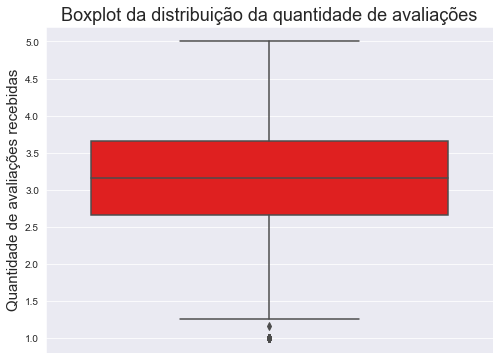

In [23]:
plt.figure(figsize=(8,6))
sns.boxplot(y = 'mean', data = df_agrupado, color='red')
plt.title('Boxplot da distribuição da quantidade de avaliações', fontsize=18)
plt.ylabel('Quantidade de avaliações recebidas', fontsize=15)
plt.show()

#### A relação entre média e quantidade de avaliações

Precisamente temos uma mediana geral de 27 avaliações por filme e uma nota médiana geral de 3,16.

In [24]:
df_agrupado.median()

id_filme    841.500000
count        27.000000
mean          3.161528
dtype: float64

Mas abrindo ainda mais esses números pelos filmes em sí, podemos enxergar...

In [25]:
#Criando um dataframe temporário para a análise em questão
df_agrupado = df_agrupado.reset_index().merge(df_item, left_on='id_filme', right_on='id_filme', how='left')

Top 10 filmes que mais receberam avaliações:

In [26]:
df_agrupado[['nome_filme','count']].sort_values(by='count', ascending=False).head(10)

,nome_filme,count
1128,Star Wars (1977),583
859,Contact (1997),509
2,Fargo (1996),508
774,Return of the Jedi (1983),507
899,Liar Liar (1997),485
890,"English Patient, The (1996)",481
892,Scream (1996),478
0,Toy Story (1995),452
907,Air Force One (1997),431
235,Independence Day (ID4) (1996),429


Top 10 filmes mais bem avaliados (com pelo menos 100 avaliações cada):

In [27]:
df_agrupado[df_agrupado['count'] > 50][['nome_filme','mean', 'count']].sort_values(by='mean', ascending=False).head(10)

,nome_filme,mean,count
1026,"Close Shave, A (1995)",4.491071,112
926,Schindler's List (1993),4.466443,298
760,"Wrong Trousers, The (1993)",4.466102,118
1109,Casablanca (1942),4.456790,243
157,Wallace & Gromit: The Best of Aardman Animatio...,4.447761,67
1283,"Shawshank Redemption, The (1994)",4.445230,283
1243,Rear Window (1954),4.387560,209
223,"Usual Suspects, The (1995)",4.385768,267
1128,Star Wars (1977),4.358491,583
770,12 Angry Men (1957),4.344000,125


Será que podemos dizer que os filmes mais avaliados, o que é uma proxy para talvez os filmes mais vistos, serem os filmes mais bem avaliados? De fato, apesar de existir alguma correlação entre essa quantidades, ela é fraca. Precisamente de 0,4. Então nem sempre isso é verdade, apesar de em alguns casos podermos dizer que sim.

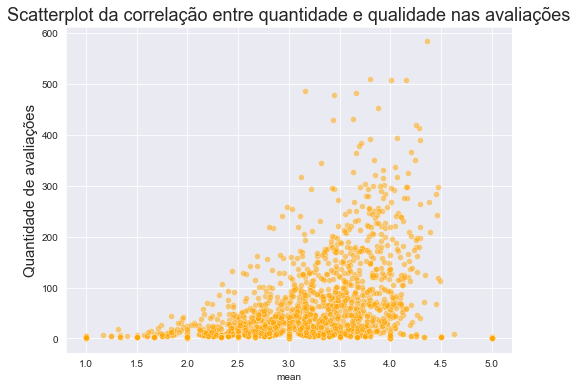

In [28]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='mean',y='count',data=df_agrupado,alpha=0.5, color='orange')
plt.title('Scatterplot da correlação entre quantidade e qualidade nas avaliações', fontsize=18)
plt.ylabel('Média das avaliações', fontsize=15)
plt.ylabel('Quantidade de avaliações', fontsize=15)
plt.show()

In [29]:
#Os números de correlação exatos vieram daqui:
df_agrupado[['mean','count']].corr()

,mean,count
mean,1.000000,0.429659
count,0.429659,1.000000


#### Quais são os temas que mais receberam avaliações

Lembrando que um filme pode pertencer a mais de um tema, temos a seguinte análise a ser feita:

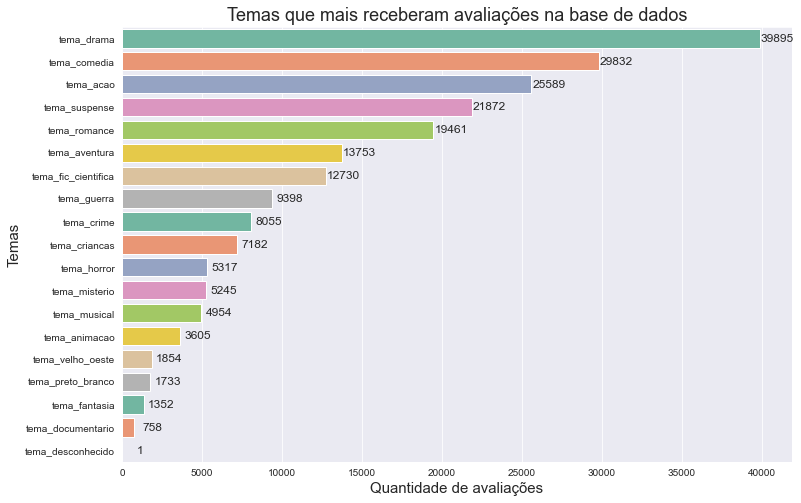

In [30]:
#Preparação do dado para a plotagem
cols = df_agrupado.columns[6:]
dict_cols = {coluna:0 for coluna in cols}

for i in df_agrupado.index:
    for coluna in cols:
        if (df_agrupado.iloc[i][coluna] == 1):
            dict_cols[coluna] += df_agrupado.iloc[i]['count']
dict_cols = {k: v for k, v in sorted(dict_cols.items(), key=lambda item: item[1], reverse=True)}

#plotagem
plt.figure(figsize=(12,8))
plt.title('Temas que mais receberam avaliações na base de dados', fontsize=18)
plt.ylabel('Temas', fontsize=15)
plt.xlabel('Quantidade de avaliações', fontsize=15)
sns.set(style="darkgrid")
ax = sns.barplot(x=list(dict_cols.values()), y=list(dict_cols.keys()),  palette="Set2")

for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'), 
                   (p.get_width() + 1100, (p.get_height()) +  p.get_y()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.show()

Temos que o Drama foi o tema que mais recebeu avaliações, seguido por comédia e ação.

#### Quantidade de filmes publicados por ano

Analisando a quantidade de filmes publicados por ano podemos ver que alguns filmes bem antigos estão sendo avaliados mesmo depois de varios anos, mas o pico nos ultimos 5 anos ainda é o que mais representa a base de dados.

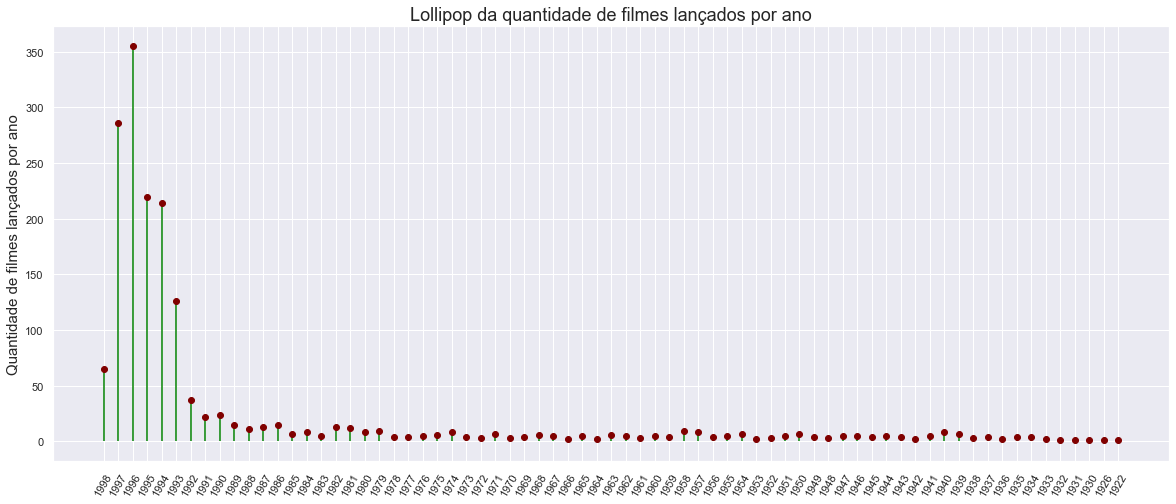

In [31]:
df_item['year'] = df_item['data_lancamento'].str[-4:]
g = df_item[['year','id_filme']].groupby(by='year').count().to_dict()
g = g['id_filme']
fig, ax = plt.subplots(figsize = (20, 8))

x=list(g.keys())[::-1]
y=list(g.values())[::-1]
ax.vlines(x, ymin=0, ymax=y, color='green')
ax.plot(x,y, "o", color='maroon')
ax.set_xticklabels(x, rotation = 60)
ax.set_ylabel("Quantidade de filmes lançados por ano", fontsize=15)
# set a title
ax.set_title("Lollipop da quantidade de filmes lançados por ano", fontsize=18)
plt.show()

#### Quantidade de avaliações por gênero

Analisando a quantidade de avaliações feitas por gênero temos que os homens tem maior presença na base de dados. Cerca de 2.9x mais avaliações.

In [32]:
df = df.merge(df_usuarios, left_on='id_usuario', right_on='id_usuario', how='left')

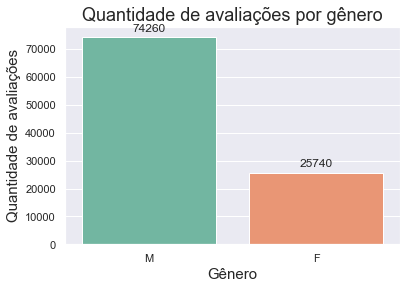

In [33]:
plt.figure()
ax = sns.countplot(x="sexo", data=df, palette="Set2")
sns.set(style="darkgrid", rc={'figure.figsize':(12,8)})
plt.title('Quantidade de avaliações por gênero', fontsize=18)
plt.ylabel('Quantidade de avaliações', fontsize=15)
plt.xlabel('Gênero', fontsize=15)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.show()

#### Quantidade de avaliações por estado (EUA)

Analisando a quantidade de avaliações feitas por cada estado dos EUA na base. Temos que os Califórnia, Minnesota e Nova Iorque são os que tem maior presença na base de dados.

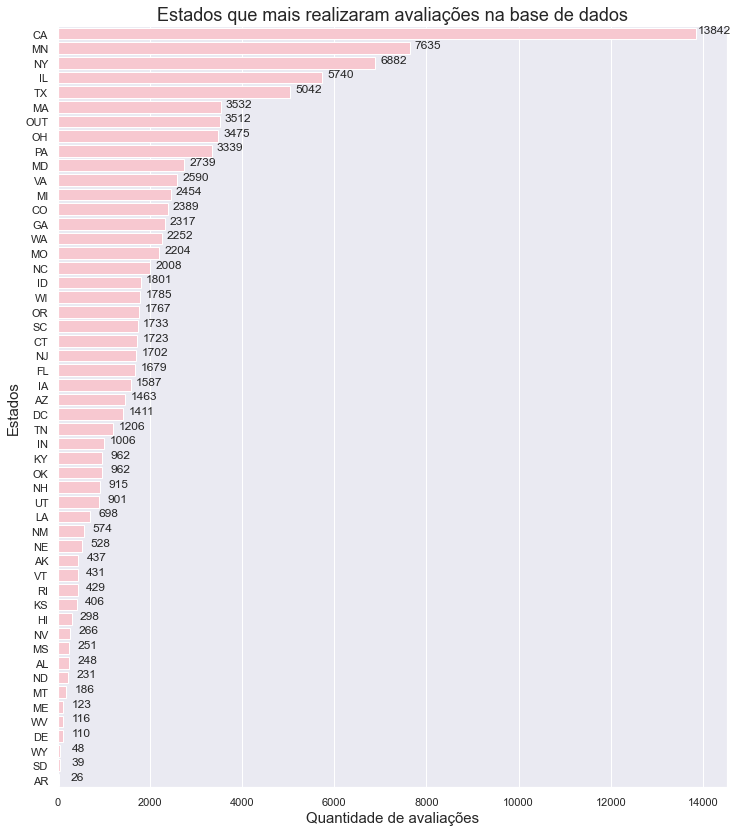

In [34]:
#Preparação do dado para a plotagem
dict_cols = df.groupby(by='estado_usa').count().to_dict()['id_usuario']
dict_cols = {k: v for k, v in sorted(dict_cols.items(), key=lambda item: item[1], reverse=True)}

#plotagem
plt.figure(figsize=(12,14))
plt.title('Estados que mais realizaram avaliações na base de dados', fontsize=18)
plt.ylabel('Estados', fontsize=15)
plt.xlabel('Quantidade de avaliações', fontsize=15)
sns.set(style="darkgrid")
ax = sns.barplot(x=list(dict_cols.values()), y=list(dict_cols.keys()),  color='pink')
    
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'), 
                   (p.get_width() + 400, (p.get_height()) +  p.get_y()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
plt.show()

#### Quantidade de avaliações por profissão

Analisando a quantidade de avaliações feitas por cada profissão na base. Temos que os estudantes são os que tem maior presença na base de dados. Cerca de 2x mais avaliações que a segunda categoria.

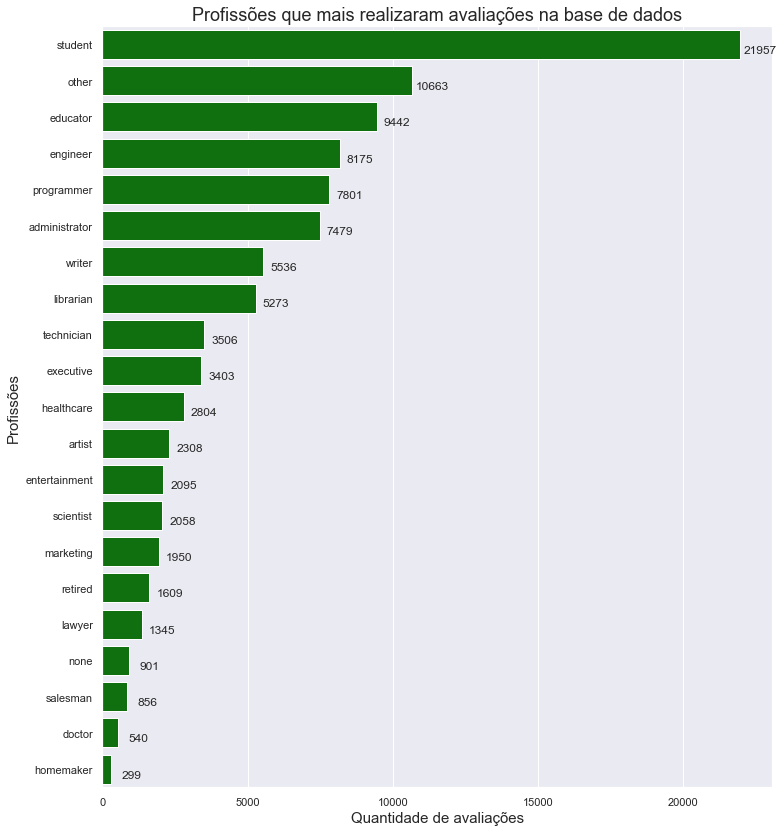

In [35]:
#Preparação do dado para a plotagem
dict_cols = df.groupby(by='profissao').count().to_dict()['id_usuario']
dict_cols = {k: v for k, v in sorted(dict_cols.items(), key=lambda item: item[1], reverse=True)}

#plotagem
plt.figure(figsize=(12,14))
plt.title('Profissões que mais realizaram avaliações na base de dados', fontsize=18)
plt.ylabel('Profissões', fontsize=15)
plt.xlabel('Quantidade de avaliações', fontsize=15)
sns.set(style="darkgrid")
ax = sns.barplot(x=list(dict_cols.values()), y=list(dict_cols.keys()),  color='green')
    
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'), 
                   (p.get_width() + 700, (p.get_height()) +  p.get_y()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
plt.show()

## 4. Sistema de Recomendação

### Popularidade

Como mencionado no início, a abordagem baseada em popularidade é a mais simples de todas. Olha diretamente para como este filme está se destacando dentre os outros dado critérios de quantidade e qualidade das avaliações recebidas, mas não distingue metadados usuários e nem de filmes. É uma recomendação mais generalista. É o famoso "O que está bombando na Netflix".

O pipeline do nosso desenvolvimento seguirá os seguintes passos:

- Definir uma métrica de popularidade que relacione quantidade e qualidade das avaliações
- Aplicar esta métrica para os filmes da base
- Ordenar o resultado e apresentar o top-N

O primeiro ponto é muito importante para o prosseguimento, uma vez que podemos encontrar filmes muito bem avaliados que ainda não tenham uma quantidade rasoável de avaliações recebidas para ponderar a média. Poderíamos ter, por exemplo, um filme com 6 avaliações e uma média de 5, que não necessáriamente seria melhor que um outro filme que possuísse 90 avaliações e uma média de 4.7 . Neste caso, estaremos utilizando uma métrica desenvolvida pelo IMDb (Internet Movie Database) que visa balancear estes pesos.

Seja WR a média ponderada do IMDb, temos:

WR = ( R\*v + C*m ) / ( v+m )

onde,

- R --> média das avaliações recebidas por um filme
- v --> quantidade de avaliações recebidas por um filme
- C --> média de todas as avaliações da base de dados
- m --> é o mínimo de avaliações que um filme precisa para entrar no ranking

Para m, vou assumir que o 90º percentil é um bom número para ser utilizado como linha de corte. Ou seja, sempre que um filme estiver acima desse valor, ele receberá a métrica de popularidade e poderá ser retornado pela função.

Bora definir esta função então!

In [36]:
def wr_imdb(dataframe, nome_coluna_avaliacoes, nome_coluna_id_filme, percentil_minimo_avaliacoes):
    """
    Função que executa a métrica de média ponderada definida pela IMDB
    
    
    Parâmetros
    ----------
    dataframe: DataFrame
        Pandas DataFrame que contem as informações necessárias para aplicação da função
    nome_coluna_avaliacoes: String
        O nome da coluna ao qual a formula será aplicada
    nome_coluna_id_filme: String
        O nome da coluna que identifica cada filme na base de dados
    percentil_minimo_avaliacoes: Float
        A quantidade do percentil que reflete o mínimo de avaliações necessárias para que um filme possa ser ranqueado
        
    
    Retorno
    ----------
    DataFrame
        Um Pandas DataFrame contendo em uma coluna o identificador de cada filme único na base e numa outra coluna a métrica de popularidade aplicada.
    """
    
    dataframe_auxiliar = dataframe[[nome_coluna_id_filme,nome_coluna_avaliacoes]].groupby(by=nome_coluna_id_filme).agg(['count','mean'])[nome_coluna_avaliacoes].reset_index()
    
    C = dataframe[nome_coluna_avaliacoes].mean()
    m = dataframe_auxiliar['count'].quantile(percentil_minimo_avaliacoes)
    
    lista_auxiliar = []
    for i in dataframe_auxiliar.index:
        if (dataframe_auxiliar.iloc[i]['count'] < m):
            lista_auxiliar.append(1)
        else:
            R = dataframe_auxiliar.iloc[i]['mean']
            v = dataframe_auxiliar.iloc[i]['count']
            lista_auxiliar.append( ( R*v + C*m ) / (v+m) )
    
    dataframe_auxiliar['popularidade'] = lista_auxiliar
    
    return dataframe_auxiliar[[nome_coluna_id_filme,'popularidade']].copy()

Vamos aplicar a função à nossa base de dados:

In [37]:
df_resultado_popularidade = wr_imdb(df, 'avaliacao', 'id_filme', 0.9)

Assim podemos ver os resultados obtidos para as 10 primeiras posições ordenadas pela popularidade.

In [38]:
df_resultado_popularidade.merge(df_item[['id_filme','nome_filme']], left_on='id_filme', right_on='id_filme', how='left').sort_values(by='popularidade', ascending=False).head(10)

,id_filme,popularidade,nome_filme
1128,50,4.172269,Star Wars (1977)
926,318,4.127508,Schindler's List (1993)
1283,64,4.102979,"Shawshank Redemption, The (1994)"
1109,483,4.076569,Casablanca (1942)
301,127,4.064513,"Godfather, The (1972)"
1660,98,4.060011,"Silence of the Lambs, The (1991)"
223,12,4.054005,"Usual Suspects, The (1995)"
766,174,4.045070,Raiders of the Lost Ark (1981)
921,313,4.012613,Titanic (1997)
1243,603,4.004091,Rear Window (1954)


### Popularidade nos últimos tempos

Também pode ser interessante análisar esta métrica de popularidade seguindo algum critério de período. Ou seja, pegar "o que está bombando nos ultimos tempos",e não na base de dados toda sem nenhum critério de busca. A netflix reconhecidamente faz este tipo de abordagem. Vamos ajustar a função definida acima então, acrescentando este parâmetro de período de tempo.

In [39]:
def current_wr_imdb(dataframe, nome_coluna_avaliacoes, nome_coluna_id_filme, percentil_minimo_avaliacoes, periodo_maximo_considerado, nome_coluna_data_avaliacao):
    """
    Função que executa a métrica de média ponderada definida pela IMDB, mas apenas para as avaliações feitas no período de tempo passado como parâmetro.
    
    
    Parâmetros
    ----------
    dataframe: DataFrame
        Pandas DataFrame que contem as informações necessárias para aplicação da função
    nome_coluna_avaliacoes: String
        O nome da coluna ao qual a formula será aplicada
    nome_coluna_id_filme: String
        O nome da coluna que identifica cada filme na base de dados
    percentil_minimo_avaliacoes: Float
        A quantidade do percentil que reflete o mínimo de avaliações necessárias para que um filme possa ser ranqueado
    periodo_maximo_considerado: Integer
        A quantidade de dias considerados na janela de análise
    nome_coluna_data_avaliacao: String
        O nome da coluna que contém a data da avaliação feita
        
    
    Retorno
    ----------
    DataFrame
        Um Pandas DataFrame contendo em uma coluna o identificador de cada filme único na base e numa outra coluna a métrica de popularidade aplicada.
    """
    
    dataframe_auxiliar = dataframe.copy()
    dataframe_auxiliar[nome_coluna_data_avaliacao] = pd.to_datetime(dataframe_auxiliar[nome_coluna_data_avaliacao])
    dataframe_auxiliar = dataframe_auxiliar[dataframe_auxiliar[nome_coluna_data_avaliacao] >=  dataframe_auxiliar[nome_coluna_data_avaliacao].max() - pd.Timedelta(days=periodo_maximo_considerado)].copy()
    
    return wr_imdb(dataframe_auxiliar, nome_coluna_avaliacoes, nome_coluna_id_filme, percentil_minimo_avaliacoes)

Vamos aplicar a função à nossa base de dados com um período de 30 dias:

In [40]:
df_resultado_popularidade_atual = current_wr_imdb(df, 'avaliacao', 'id_filme', 0.9, 30, 'data_avaliacao')

Assim podemos ver os resultados obtidos para as 10 primeiras posições ordenadas pela popularidade atual.

In [41]:
df_resultado_popularidade_atual.merge(df_item[['id_filme','nome_filme']], left_on='id_filme', right_on='id_filme', how='left').sort_values(by='popularidade', ascending=False).head(10)

,id_filme,popularidade,nome_filme
691,318,4.209171,Schindler's List (1993)
889,50,4.203111,Star Wars (1977)
1004,603,4.143653,Rear Window (1954)
809,427,4.078102,To Kill a Mockingbird (1962)
733,357,4.072244,One Flew Over the Cuckoo's Nest (1975)
870,483,4.069633,Casablanca (1942)
2,100,4.052541,Fargo (1996)
906,515,4.036098,"Boot, Das (1981)"
641,272,4.032582,Good Will Hunting (1997)
198,12,4.026560,"Usual Suspects, The (1995)"


Interessante notar que por exemplo "Schindler's List (1993)", agora o primeiro, trocou de posição com "Star Wars (1977)", que agora é segundo. E também que, por exemplo, "Rear Window (1954)" de 1954 aparece agora no top 3, e anteriormente este filme nem estava na lista. Curioso, pois mesmo em 1997 filmes de 54' ainda eram muito avaliados.

#### Busca por tema

Desenvolvemos também uma função que filtra a base de interações de acordo com um tema escolhido. Isso pode ser de ajuda em qualquer aplicação futura. Poderíamos por exemplo pegar os filmes com tema "crianças" mais populares, combinando as funções anteriormente construídas.

In [42]:
def search_theme(dataframe_interacoes, dataframe_filmes, theme):
    """
    Função que filtra o conjunto de dados principal (interações) de acordo com um tema passado como parâmetro.
    
    
    Parâmetros
    ----------
    dataframe_interacoes: DataFrame
        Pandas DataFrame que contem as informações das avaliações realizadas ao longo do tempo
    dataframe_filmes: DataFrame
        Pandas DataFrame que contem as informações dos temas de cada filme
    theme: String
        Nome da coluna que indica o tema a ser procurado.
        
        
    Retorno
    ----------
    DataFrame
        Existem dois retornos possíveis:
            1. Um Pandas DataFrame vazio, caso a string passada como parâmetro em "theme" não encontre nenhuma coluna no dataframe de filmes; e caso contrário
            2. Um Pandas DataFrame contendo o dataframe de interações (avaliações) filtrado pelo tema passado como parâmetro.
    
    """
    
    if (theme not in dataframe_filmes.columns):
        print( "Erro: O tema que você está procurando não foi encontrado" )
        return pd.DataFrame()
    else:
        dataframe_filmes['filtro'] = True
        dataframe_interacoes = dataframe_interacoes.merge(dataframe_filmes[dataframe_filmes[theme]==1][['id_filme','filtro']], left_on='id_filme', right_on='id_filme', how='left')
        
        return dataframe_interacoes[dataframe_interacoes['filtro'].notna()].copy()
        

Os filmes com o tema "crianças" mais populares dos últimos 30 dias:

In [43]:
current_wr_imdb(search_theme(df, df_item, "tema_criancas"), 'avaliacao', 'id_filme', 0.9, 30, 'data_avaliacao').merge(df_item[['id_filme','nome_filme']], 
                                                                              left_on='id_filme', right_on='id_filme', how='left').sort_values(by='popularidade', ascending=False).head(10)

,id_filme,popularidade,nome_filme
21,132,3.891380,"Wizard of Oz, The (1939)"
0,1,3.776050,Toy Story (1995)
59,423,3.755508,E.T. the Extra-Terrestrial (1982)
89,8,3.736454,Babe (1995)
61,432,3.713734,Fantasia (1940)
74,588,3.706610,Beauty and the Beast (1991)
108,99,3.699945,Snow White and the Seven Dwarfs (1937)
56,419,3.644769,Mary Poppins (1964)
34,151,3.618621,Willy Wonka and the Chocolate Factory (1971)
43,304,3.613059,Fly Away Home (1996)


### Baseados em Filtragem-Colaborativa

In [44]:
df.head()

,id_usuario,id_filme,avaliacao,data_avaliacao,idade,sexo,profissao,estado_usa
0,196,242,3,1997-12-04,49,M,writer,MN
1,186,302,3,1998-04-04,39,F,executive,OUT
2,22,377,1,1997-11-07,25,M,writer,KY
3,244,51,2,1997-11-27,28,M,technician,CO
4,166,346,1,1998-02-02,47,M,educator,MN


In [45]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
reader = Reader()

In [47]:
data = Dataset.load_from_df(df[['id_usuario', 'id_filme', 'avaliacao']], reader)

In [72]:
svd = SVD()
cross_validate(svd, data, measures=['RMSE', 'MAE', 'FCP'], cv=5)

{'test_rmse': array([0.93131148, 0.93840144, 0.9323115 , 0.93601992, 0.9400645 ]),
 'test_mae': array([0.73468909, 0.73688778, 0.73607347, 0.73875436, 0.74109193]),
 'test_fcp': array([0.70217071, 0.69476912, 0.69731536, 0.69113566, 0.70384833]),
 'fit_time': (3.8585572242736816,
  4.056389808654785,
  4.121734380722046,
  4.6967079639434814,
  4.690768718719482),
 'test_time': (0.10674524307250977,
  0.10671186447143555,
  0.10970878601074219,
  0.13164043426513672,
  0.132645845413208)}

In [73]:
trainset = data.build_full_trainset()
svd.fit(trainset)

Exemplo de alguns filmes visto pelo usuario 222

In [88]:
df[df['id_usuario'] == '222']

,id_usuario,id_filme,avaliacao,data_avaliacao,idade,sexo,profissao,estado_usa
85,222,366,4,1997-10-30,29,M,programmer,NC
127,222,750,5,1998-01-03,29,M,programmer,NC
188,222,755,4,1997-10-30,29,M,programmer,NC
298,222,118,4,1997-10-22,29,M,programmer,NC
320,222,77,4,1997-10-30,29,M,programmer,NC
...,...,...,...,...,...,...,...,...
94842,222,410,2,1997-10-22,29,M,programmer,NC
95809,222,405,3,1997-10-22,29,M,programmer,NC
95862,222,762,3,1997-10-22,29,M,programmer,NC
98000,222,241,3,1997-10-30,29,M,programmer,NC


Um filme que ele nao gostou muito

In [93]:
svd.predict('222', '133', 3)

Prediction(uid='222', iid='133', r_ui=3, est=2.6294916188611546, details={'was_impossible': False})

Um filme que ele adorou

In [90]:
svd.predict('222', '750', 3)

Prediction(uid='222', iid='750', r_ui=3, est=3.9942470050964323, details={'was_impossible': False})